importing the libraries

In [1]:
pip install dfply

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 9.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import*
from dfply import*


In [3]:
url='https://raw.githubusercontent.com/no37no37/heart_disease_analysis/refs/heads/main/heart.csv'
data=pd.read_csv(url)
print(data.head)
print(data.tail)

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

In [4]:
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [5]:
data.shape

(1025, 14)

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
#looking for NA values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
# we will look for duplicates
data.duplicated().sum()

723

In [10]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1020,True
1021,True
1022,True
1023,True


In [11]:
#dropping the duplicates
data.drop_duplicates(inplace=True) #(inplace=True) means will replace in actual dataframe

In [12]:
data.duplicated().sum()

0

In [13]:
# after effect of dropping
data.shape

(302, 14)

In [14]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [15]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

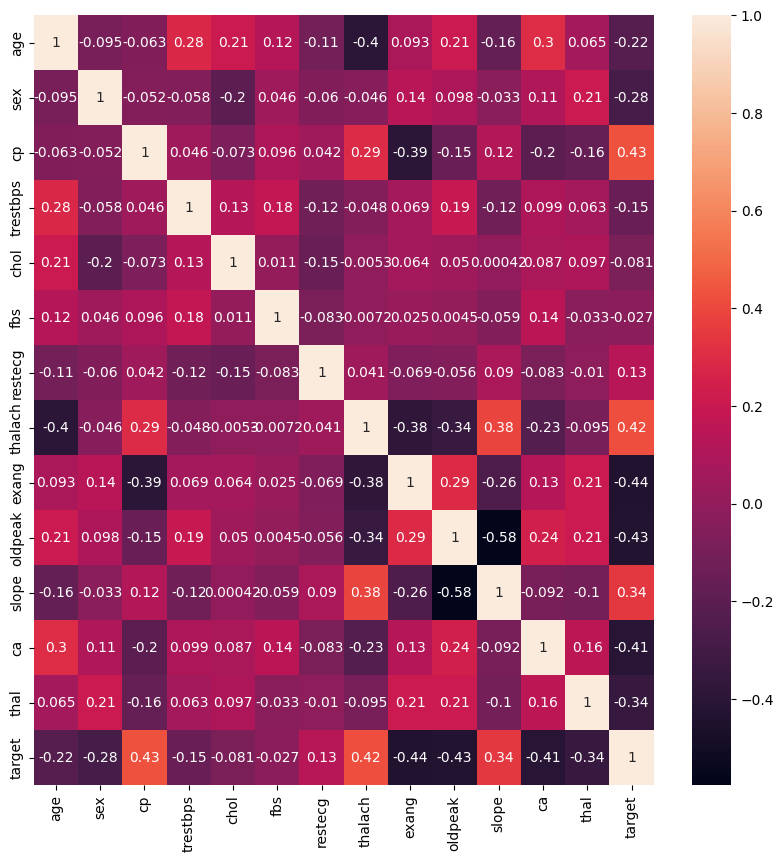

In [16]:
# let's plot,
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [17]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [18]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Our main goal here is various. we want to have various insights from this dataset.

1. Risk Factor Analysis
Which features are strongly associated with heart disease?
--> let's analyze: how variables like chest pain type (cp), maximum heart rate achieved (thalach), or ST depression (oldpeak) differ between patients with and without heart disease (target).

In [19]:
# let's describe those cols first,
data[['cp','thalach','oldpeak','target']].describe()

,cp,thalach,oldpeak,target
count,302.000000,302.000000,302.000000,302.000000
mean,0.963576,149.569536,1.043046,0.543046
std,1.032044,22.903527,1.161452,0.498970
min,0.000000,71.000000,0.000000,0.000000
25%,0.000000,133.250000,0.000000,0.000000
50%,1.000000,152.500000,0.800000,1.000000
75%,2.000000,166.000000,1.600000,1.000000
max,3.000000,202.000000,6.200000,1.000000


In [20]:
data[['cp']].quantile([0,0.25,0.50,0.75,1]) # this shows that there is three types of chest pains recorded here.

,cp
0.00,0.0
0.25,0.0
0.50,1.0
0.75,2.0
1.00,3.0


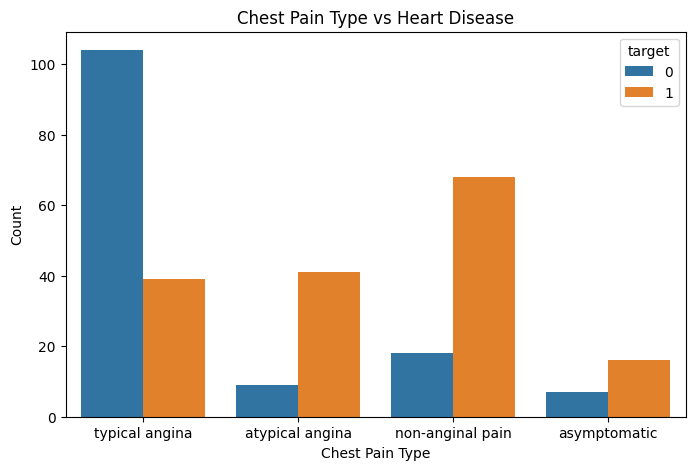

In [65]:
# Visualizing the distribution of chest pain type with respect to target where 0 = no heart disese and 1 = has heart disese
plt.figure(figsize=(8, 5))
sns.countplot(data, x='cp', hue='target')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.show()


let's do same for max heart rate achieved

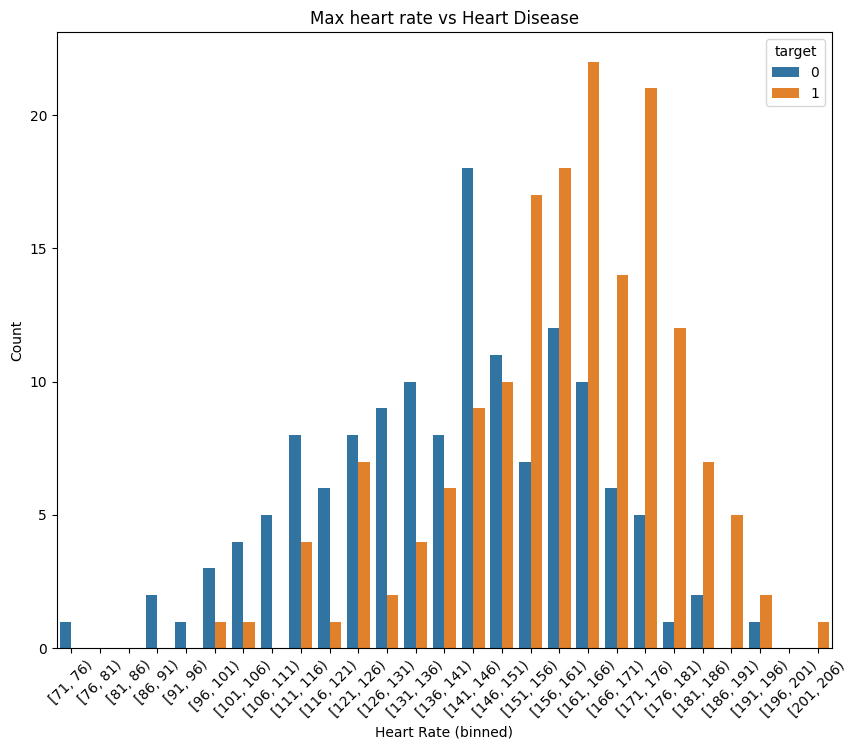

In [22]:
bin_size = 5
data['thalach_binned'] = pd.cut(data['thalach'], bins=range(int(data['thalach'].min()), int(data['thalach'].max()) + bin_size, bin_size), right=False)

# Create the countplot with the binned values
plt.figure(figsize=(10,8))
sns.countplot(data=data, x='thalach_binned', hue='target')
plt.title('Max heart rate vs Heart Disease')
plt.xlabel('Heart Rate (binned)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Let's do it for, ST depression (oldpeak) which shows The amount of ST depression observed during exercise relative to rest, measured in mm. Indicates potential ischemia which is included with CP,max heart rate---this gives us the wholistic view to have a grasp how the 3 factors actually effecting for heart disease.

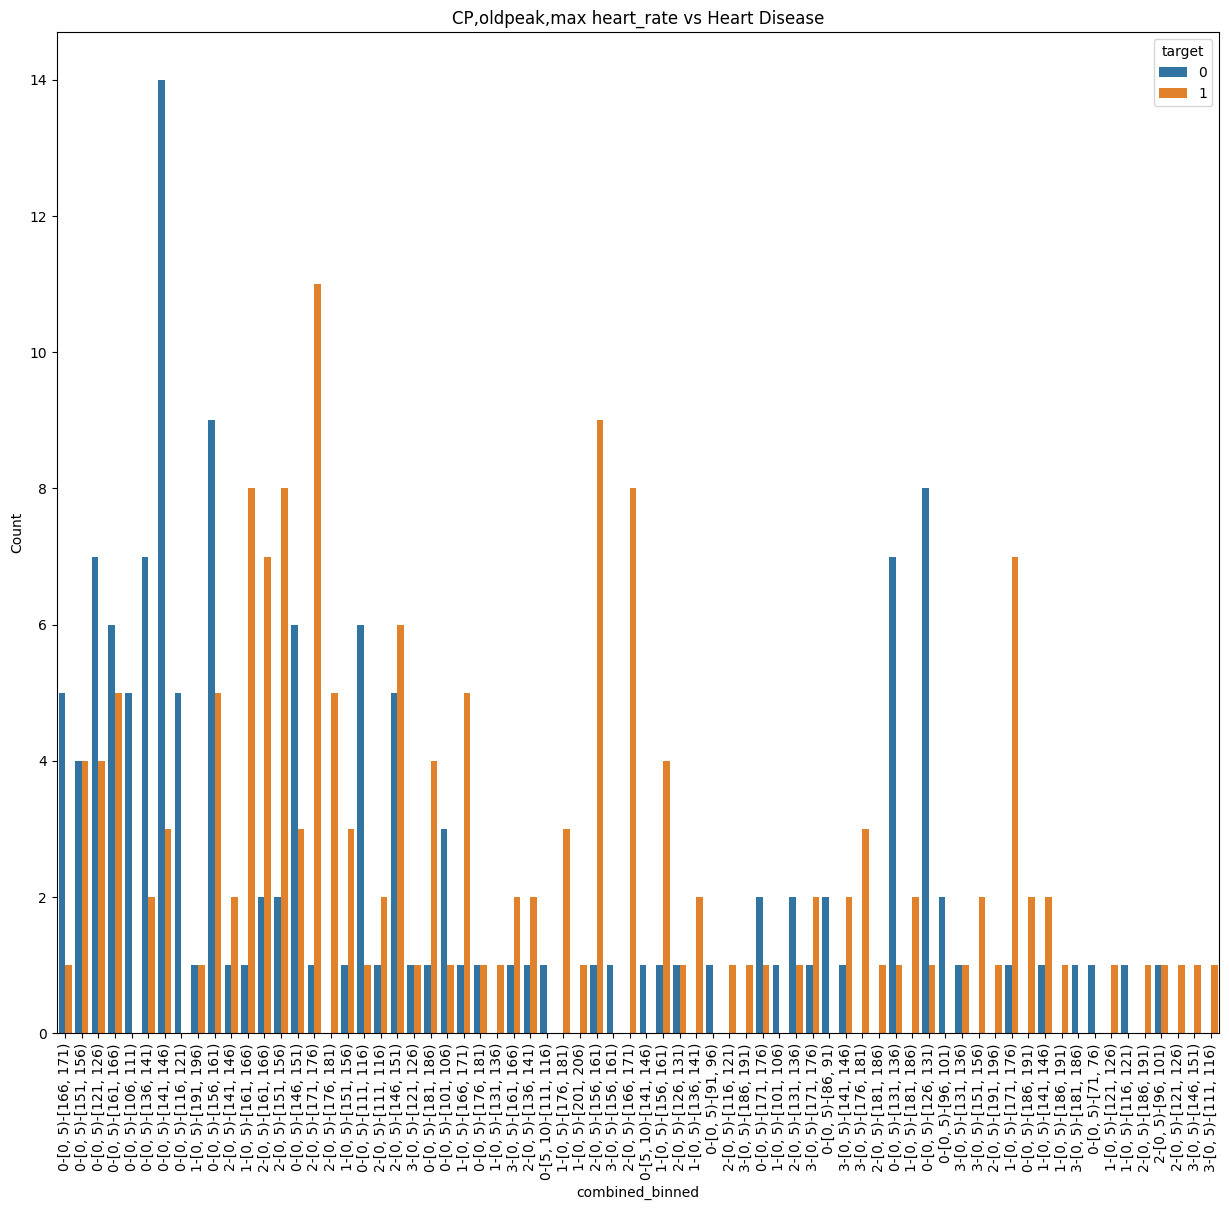

In [23]:
bin_size = 5

data['oldpeak_binned'] = pd.cut(data['oldpeak'], bins=range(int(data['oldpeak'].min()), int(data['oldpeak'].max()) + bin_size, bin_size), right=False)
data['combined_binned'] = data['cp'].astype(str) + '-' + data['oldpeak_binned'].astype(str) + '-' + data['thalach_binned'].astype(str)

plt.figure(figsize=(15,13))
sns.countplot(data=data, x='combined_binned', hue='target')
plt.title('CP,oldpeak,max heart_rate vs Heart Disease')
plt.xlabel('combined_binned')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

From the visualization, you can derive the following insights:

Lower thalach (max heart rate): If lower heart rates are grouped in one of the bins (for example, thalach_binned showing values like 60-65), and these correspond to higher counts of heart disease, this aligns with the idea that a lower max heart rate might indicate worse heart health.

Chest pain (cp): The presence of chest pain (cp=1) likely correlates with higher heart disease counts, as chest pain is often associated with more serious heart conditions.

Oldpeak: The range from 0 to 5 in oldpeak will likely show that people with less depression in the ECG (lower values of oldpeak) are in better health and less likely to have heart disease.

Let's have a Correlation analysis between chol, age, and target.


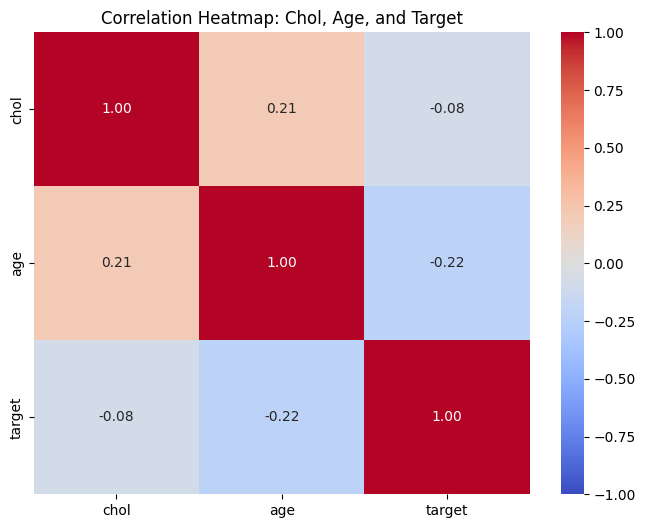

In [24]:
com_data = ['chol', 'age', 'target']
corr_matrix = data[com_data].corr()

plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)
# Customize the plot
plt.title('Correlation Heatmap: Chol, Age, and Target')
plt.show()


This describes that Chol and age alone is good predictor for heart disease detection

**2. Demographic Trends**

Age vs. Disease Prevalence:

Let's explore the distribution of heart disease across different age groups.


In [25]:
data['age'].shape

(302,)

In [26]:
#age distribution within the dataset
print(data['age'].describe())

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64


In [27]:
# this is unusual to have age in float type so convert it
data['age']=data['age'].astype(int)
data['age'].head()

,age
0,52
1,53
2,70
3,61
4,62


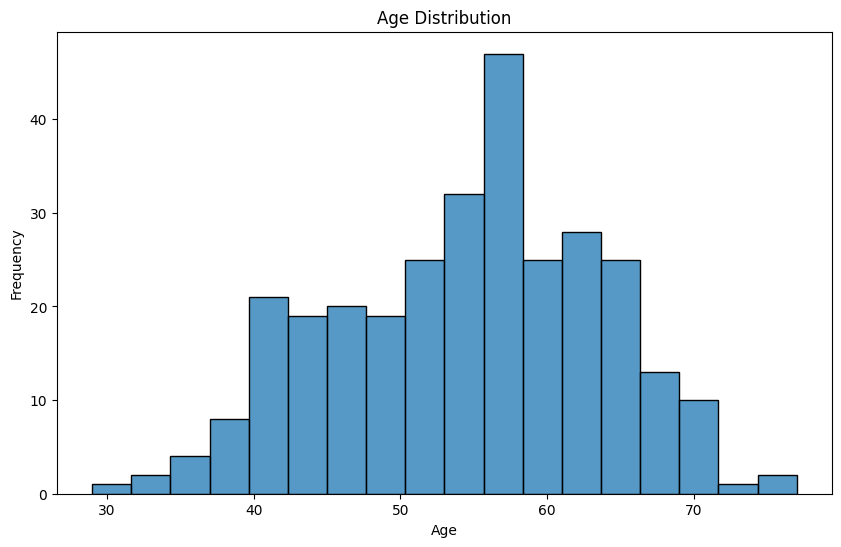

In [28]:
# the age distribution
plt.figure(figsize=(10,6))
sns.histplot(data['age'], bins=18, kde=False)  # Histogram with 20 bins
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

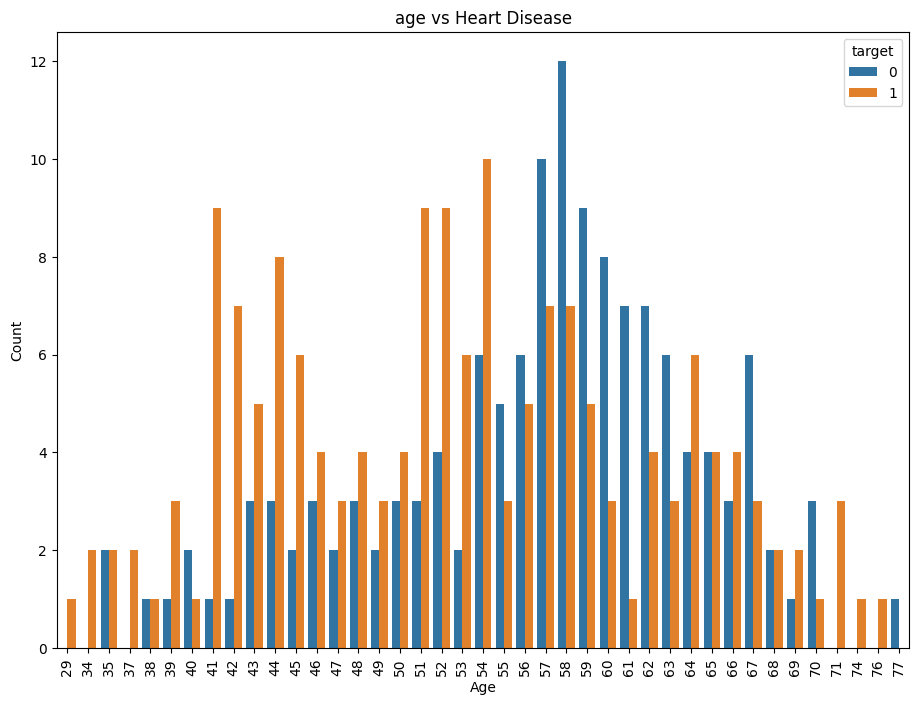

In [29]:
bin_size = 5
# Create the countplot with the binned values
plt.figure(figsize=(11,8))
sns.countplot(data=data, x='age', hue='target')
plt.title('age vs Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The bar charts indicate that age is not a highly significant factor in determining heart disease risk, as individuals across various age groups can be affected by the condition.

Let's analyze how heart disease prevalence differs between males (1) and females (0).


In [30]:
data['sex']

,sex
0,1
1,1
2,1
3,1
4,0
...,...
723,0
733,0
739,1
843,1


In [31]:
disease_ratio = data.groupby('sex')['target'].value_counts(normalize=True).unstack()*100
# we are normalizing the main counted data so that we can get the portion of the whole scenario and unstack() formats it to corresponding cols.
# Displaying the ratio of each target for male and female
print(disease_ratio)


target          0          1
sex                         
0       25.000000  75.000000
1       55.339806  44.660194


this shows that Females are most affected with heart diseases because men are brave

**3. Lifestyle and Medical Factors**

Impact of Fasting Blood Sugar (fbs):

Indicates if the patient’s fasting blood sugar is above 120 mg/dL. Encoded as:

1: True (fasting blood sugar > 120 mg/dL)

0: False

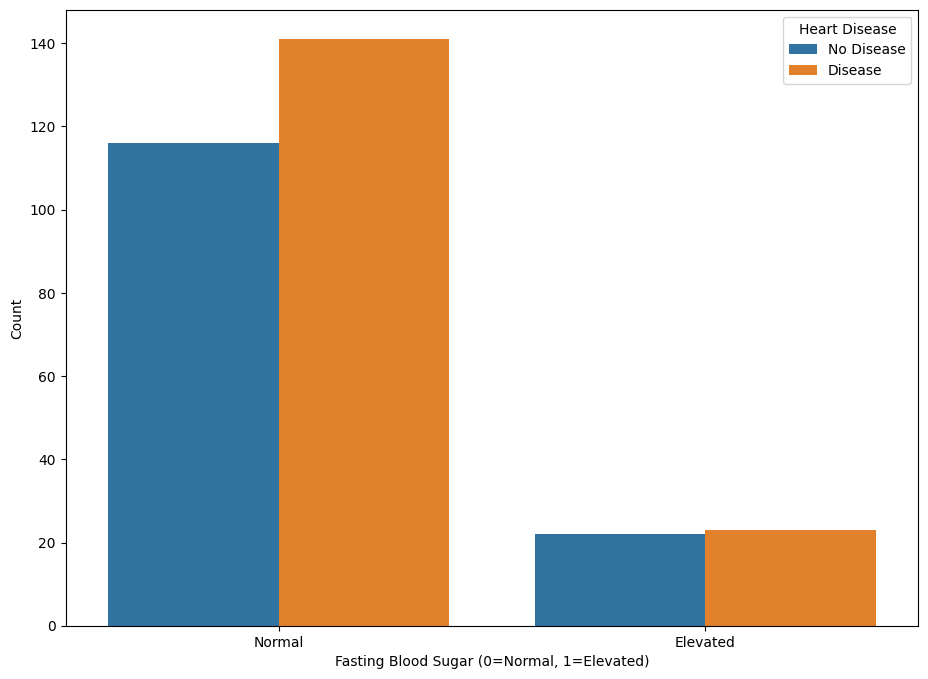

In [77]:
bin_size = 5
# Create the countplot with the binned values
plt.figure(figsize=(11,8))
sns.countplot(data=data, x='fbs', hue='target')
plt.xlabel('Fasting Blood Sugar (0=Normal, 1=Elevated)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Elevated'])
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

In [33]:
fbs_ratio = data.groupby('fbs')['target'].value_counts(normalize=True).unstack()*100
fbs_ratio

target,0,1
fbs,,
0,45.136187,54.863813
1,48.888889,51.111111


It shows that, fbs has no specific impact as people with or without it has same percentile of heart disease.

Cholesterol Levels (chol):

Let's Identify the thresholds of cholesterol levels above which heart disease becomes more likely.

First, we must see how the data distributed for the patients with or without heart diseases.

2nd-> the actual analysis of 'chol' threshold

In [34]:
data['chol'].describe()

,chol
count,302.000000
mean,246.500000
std,51.753489
min,126.000000
25%,211.000000
50%,240.500000
75%,274.750000
max,564.000000


<ipython-input-35-f7a4ec5bd5d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



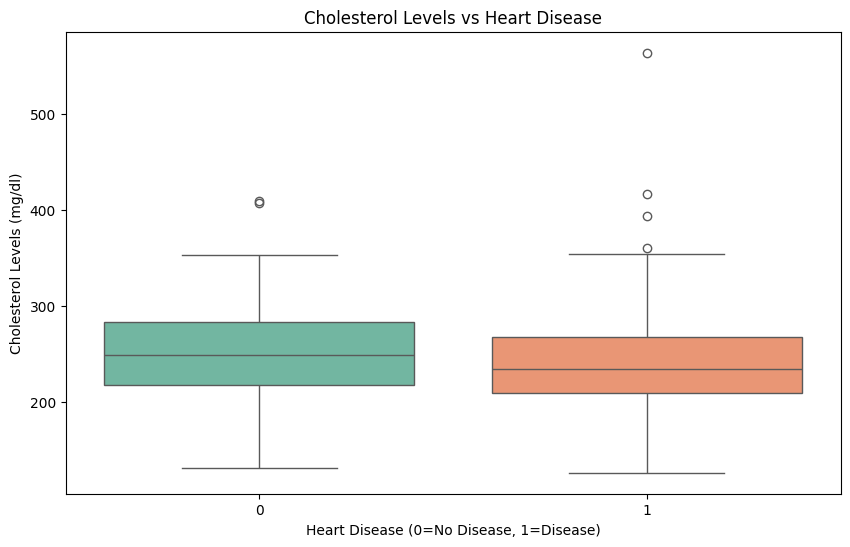

In [35]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=data, x='target', y='chol', palette="Set2")
plt.title('Cholesterol Levels vs Heart Disease')
plt.xlabel('Heart Disease (0=No Disease, 1=Disease)')
plt.ylabel('Cholesterol Levels (mg/dl)')

# Show the plot
plt.show()

so there is some outliers with interesting fact that, the chol levels are lower than non heart disease patients.

let's move on to 2nd phase, analyzing the threshold

In [36]:
# the mean and median cholesterol level for both groups
chol_mean_by_target = data.groupby('target')['chol'].mean()
chol_median_by_target = data.groupby('target')['chol'].median()

print(f"Mean cholesterol levels by target:\n{chol_mean_by_target}")
print(f"Median cholesterol levels by target:\n{chol_median_by_target}")


Mean cholesterol levels by target:
target
0    251.086957
1    242.640244
Name: chol, dtype: float64
Median cholesterol levels by target:
target
0    249.0
1    234.5
Name: chol, dtype: float64


It is quite normal for people with high chol likely to have heart disease but in this dataset it's inversed. This also supports the boxplot analysis.

**4. Exercise and Stress Response**

Exercise-Induced Angina (exang):

Let's assess how exercise-induced angina correlates with heart disease.

if angina was induced by exercise. Encoded as:

1: Yes

0: No


In [37]:
data['exang'].describe()

,exang
count,302.000000
mean,0.327815
std,0.470196
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [38]:
exang_impact = data.groupby('exang')['target'].value_counts(normalize=True).unstack() * 100
print(exang_impact)

target          0          1
exang                       
0       30.541872  69.458128
1       76.767677  23.232323


Maximum Heart Rate (thalach):

Identify patterns in heart rate where disease risk increases.


In [39]:
data['thalach'].describe()

,thalach
count,302.000000
mean,149.569536
std,22.903527
min,71.000000
25%,133.250000
50%,152.500000
75%,166.000000
max,202.000000


In [40]:
data['thalach'].info()

<class 'pandas.core.series.Series'>
Index: 302 entries, 0 to 878
Series name: thalach
Non-Null Count  Dtype
--------------  -----
302 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [41]:
from itertools import count
rd = (data
    >> select(X.target, X.thalach)
    >> arrange(desc(X.thalach))
    >> filter_by(X.target == 1)
)

print(f"heart patient: {len(rd)}")
heart_patients = rd

dr = (data
    >> select(X.target, X.thalach)
    >> arrange(desc(X.thalach))
    >> filter_by(X.target == 0)
)

print(f"non heart patient: {len(dr)}")
non_heart_patients = dr


rddr=pd.concat([heart_patients,non_heart_patients])
print(rddr)

heart patient: 164
non heart patient: 138
     target  thalach
60        1      202
210       1      194
12        1      192
104       1      190
245       1      188
..      ...      ...
177       0       96
97        0       95
356       0       90
140       0       88
267       0       71

[302 rows x 2 columns]


<ipython-input-42-2f4c5c3e9d82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



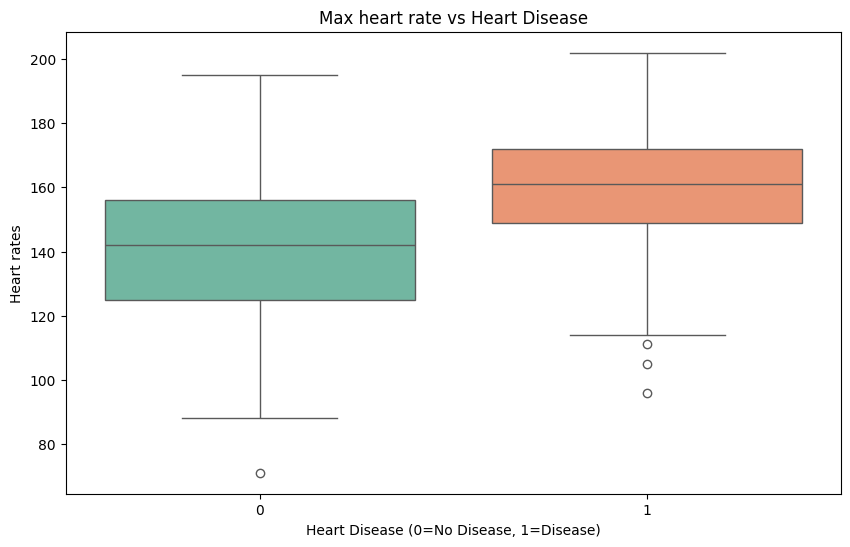

In [42]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=rddr, x='target', y='thalach', palette="Set2")
plt.title('Max heart rate vs Heart Disease')
plt.xlabel('Heart Disease (0=No Disease, 1=Disease)')
plt.ylabel('Heart rates')

# Show the plot
plt.show()

It is clear that those who has high heart rates are mostly in heart diseases.

Let's see how many of them are male and female

In [47]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,thalach_binned,oldpeak_binned,combined_binned
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,"[166, 171)","[0, 5)","0-[0, 5)-[166, 171)"
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,"[151, 156)","[0, 5)","0-[0, 5)-[151, 156)"
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,"[121, 126)","[0, 5)","0-[0, 5)-[121, 126)"
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,"[161, 166)","[0, 5)","0-[0, 5)-[161, 166)"
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,"[106, 111)","[0, 5)","0-[0, 5)-[106, 111)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,"[111, 116)","[0, 5)","2-[0, 5)-[111, 116)"
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,"[171, 176)","[0, 5)","2-[0, 5)-[171, 176)"
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,"[161, 166)","[0, 5)","0-[0, 5)-[161, 166)"
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,"[121, 126)","[0, 5)","3-[0, 5)-[121, 126)"


In [48]:
from itertools import count
fd = (data
    >> select(X.target, X.sex)
    >> group_by(X.sex)
    >> filter_by(X.target == 1)
    )

print(f"heart patient: {len(fd)}")
heart_patients = fd

df = (data
    >> select(X.target, X.sex)
    >> group_by(X.sex)
    >> filter_by(X.target == 0)
)

print(f"non heart patient: {len(df)}")
non_heart_patients = df


fddf=pd.concat([heart_patients,non_heart_patients])
print(fddf)

heart patient: 164
non heart patient: 138
     target  sex
5         1    0
10        1    0
12        1    0
16        1    0
18        1    0
..      ...  ...
694       0    1
720       0    1
739       0    1
843       0    1
878       0    1

[302 rows x 2 columns]


In [51]:
bysh = pd.merge(rddr, fddf, on='target', how='inner')
bysh

,target,thalach,sex
0,1,202,0
1,1,202,0
2,1,202,0
3,1,202,0
4,1,202,0
...,...,...,...
45935,0,71,1
45936,0,71,1
45937,0,71,1
45938,0,71,1


<ipython-input-64-f7027f05bb47>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
<ipython-input-64-f7027f05bb47>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


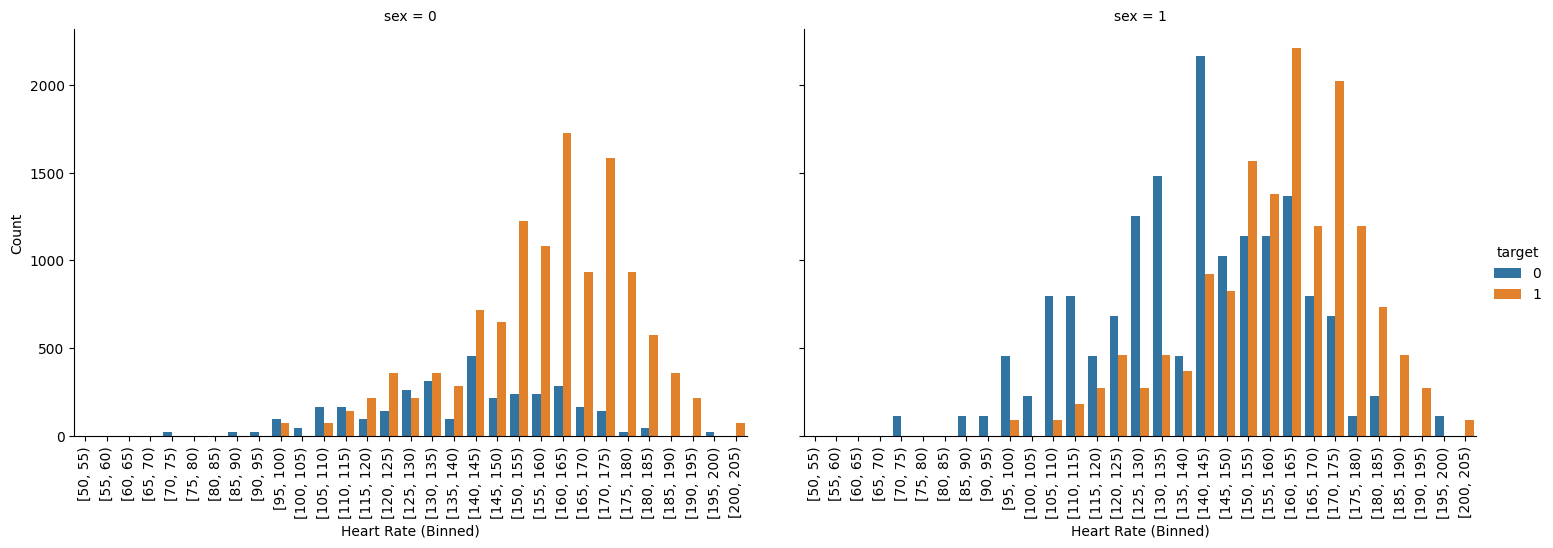

In [64]:
bin_size = 5
bysh['thalach_binned'] = pd.cut(bysh['thalach'], bins=range(50, 210, bin_size), right=False)
g = sns.catplot(data=bysh, x='thalach_binned', hue='target', col='sex', kind='count', height=5, aspect=1.5)
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
g.set_axis_labels('Heart Rate (Binned)', 'Count')

plt.show()

The charts indicate a simple fact that the higher heart rate, the higher heart disease affection.

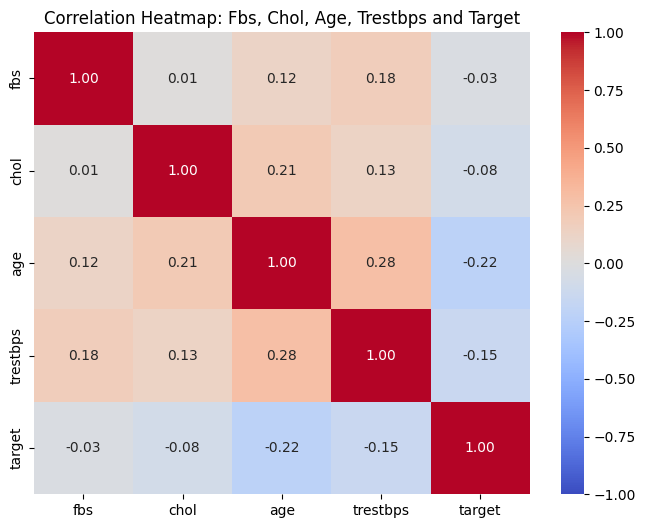

In [75]:
com_data = ['fbs','chol', 'age', 'trestbps','target']
corr_matrix = data[com_data].corr()

plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)
# Customize the plot
plt.title('Correlation Heatmap: Fbs, Chol, Age, Trestbps and Target')
plt.show()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,thalach_binned,oldpeak_binned,combined_binned
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,"[166, 171)","[0, 5)","0-[0, 5)-[166, 171)"
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,"[151, 156)","[0, 5)","0-[0, 5)-[151, 156)"
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,"[121, 126)","[0, 5)","0-[0, 5)-[121, 126)"
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,"[161, 166)","[0, 5)","0-[0, 5)-[161, 166)"
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,"[106, 111)","[0, 5)","0-[0, 5)-[106, 111)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,"[111, 116)","[0, 5)","2-[0, 5)-[111, 116)"
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,"[171, 176)","[0, 5)","2-[0, 5)-[171, 176)"
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,"[161, 166)","[0, 5)","0-[0, 5)-[161, 166)"
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,"[121, 126)","[0, 5)","3-[0, 5)-[121, 126)"


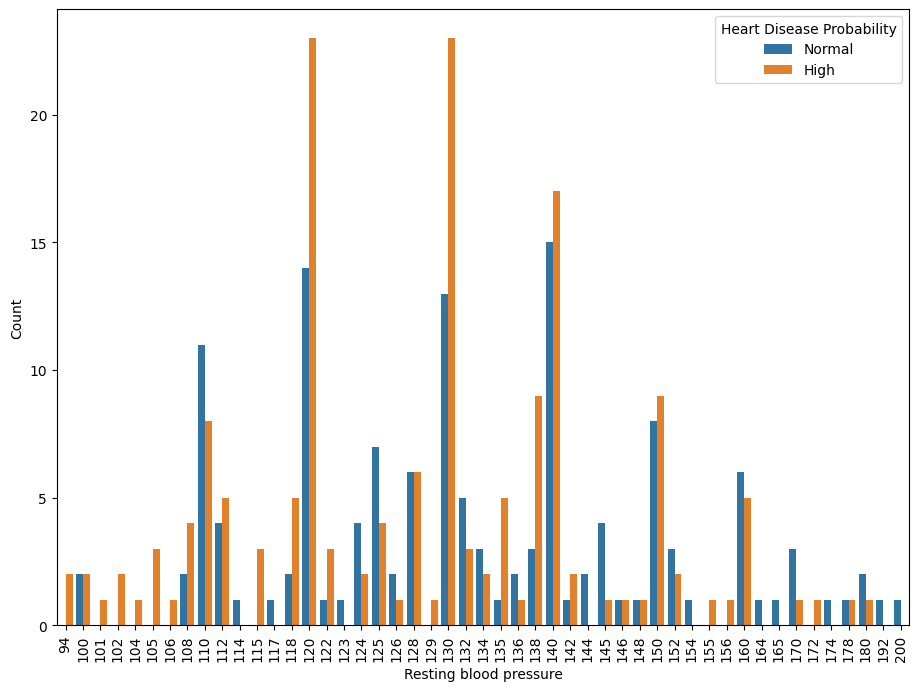

In [105]:
plt.figure(figsize=(11,8))
sns.countplot(data=data, x='trestbps', hue='target')
plt.xlabel('Resting blood pressure')
plt.ylabel('Count')
plt.legend(title='Heart Disease Probability', labels=['Normal', 'High'])
plt.xticks(rotation=90)
plt.show()

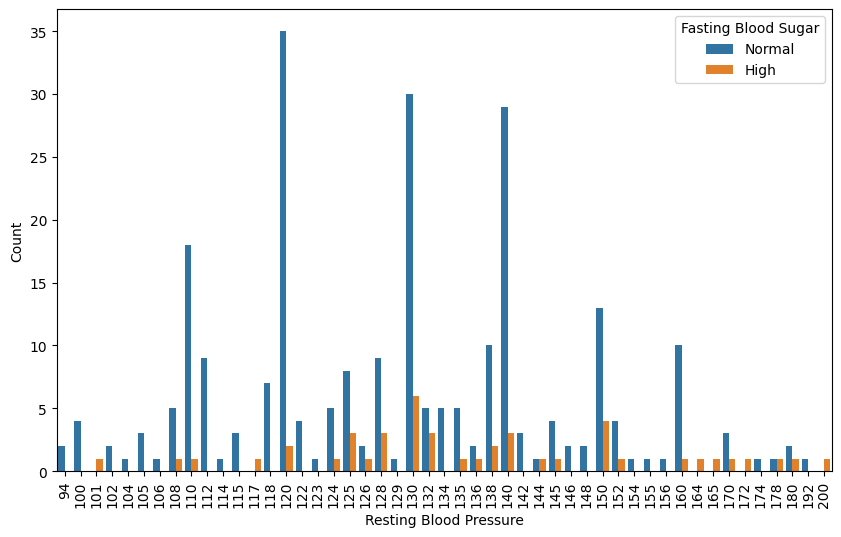

In [92]:
bin_size = 5
# Create the countplot with the binned values
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='trestbps', hue='fbs')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Count')
plt.legend(title='Fasting Blood Sugar', labels=['Normal', 'High'])
plt.xticks(rotation=90)
plt.show()

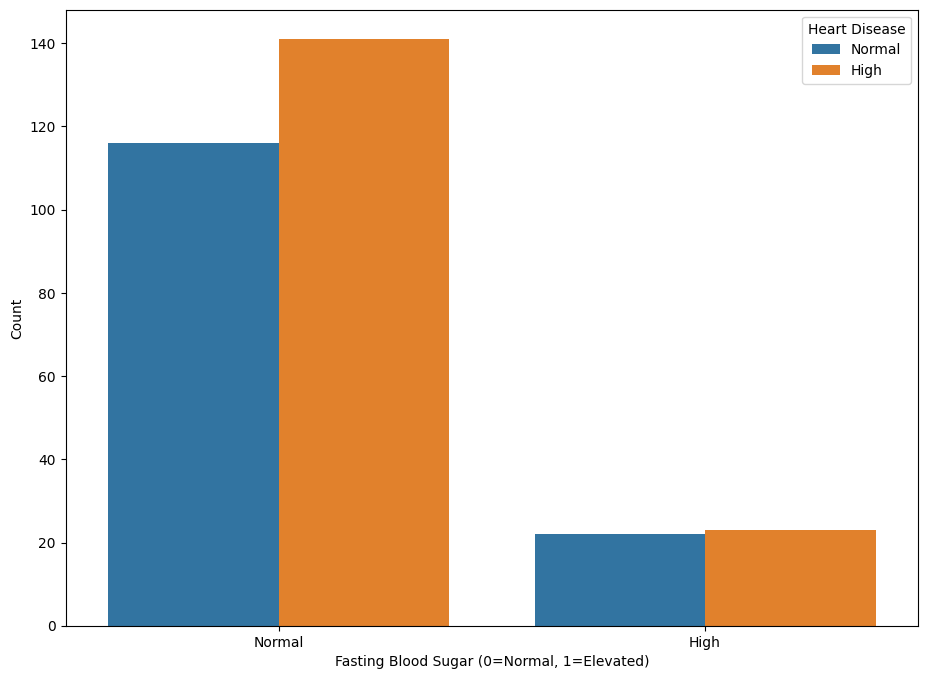

In [94]:
bin_size = 5
# Create the countplot with the binned values
plt.figure(figsize=(11,8))
sns.countplot(data=data, x='fbs', hue='target')
plt.xlabel('Fasting Blood Sugar (0=Normal, 1=Elevated)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'High'])
plt.legend(title='Heart Disease', labels=['Normal', 'High'])
plt.show()

Using last 3 charts, I tried to find any relation which might show us why they are having heart disease but it is not very insightful to find the important factor.

In this analysis I tried to analyze the dataset and find out how actually the given values directing the probability of heart disease.

I cleaned the data which had duplicated values, by dropping them. The dataset has columns:

'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'

I tried to address as many facts I could get and still feel that, it's a great experience.